In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import gzip
import ssl

In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images, test_images = train_images, test_images


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], color = "white")
plt.show()

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5176 - accuracy: 0.4490 - val_loss: 1.2937 - val_accuracy: 0.5372
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1547 - accuracy: 0.5900 - val_loss: 1.0900 - val_accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0027 - accuracy: 0.6476 - val_loss: 0.9748 - val_accuracy: 0.6597
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8981 - accuracy: 0.6823 - val_loss: 0.9838 - val_accuracy: 0.6537
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8210 - accuracy: 0.7106 - val_loss: 0.9347 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7570 - accuracy: 0.7340 - val_loss: 0.8533 - val_accuracy: 0.7061
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6985 - accuracy: 0.7542 - val_loss: 0.8351 -

313/313 - 1s - loss: 0.8716 - accuracy: 0.7162


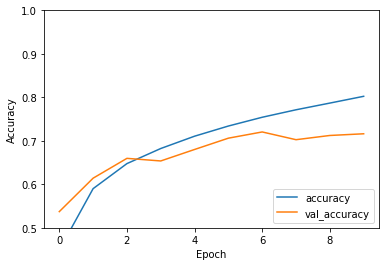

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [28]:
print(test_acc)

0.7161999940872192


In [3]:
import pandas
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [4]:
import rioxarray as rxr
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np


In [5]:
batch_size = 50
img_width, img_height, img_num_channels = 4800, 4800, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 25
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [49]:
filePathNDVI = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\NDVI\MOD13Q1.A2019017.h08v05.061.2020286170338.hdf'
filePathFire = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\Fire\MCD64A1.A2019060.h08v05.006.2019141211730.hdf'
filePathFire2 = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\Fire\MCD64A1.A2019001.h08v05.006.2019065144114.hdf'
filePathFireMask1 = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\Fire_Mask\MYD14A2.A2018361.h08v05.006.2019010121535.hdf'
filePathFireMask2 = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\Fire_Mask\MYD14A2.A2019001.h08v05.006.2019014152912.hdf'

NDVI = rxr.open_rasterio(filePathNDVI, masked = True)
FIRE = rxr.open_rasterio(filePathFire, masked = True)
FIRE2 = rxr.open_rasterio(filePathFire2, masked = True)
FIREMASK1 = rxr.open_rasterio(filePathFireMask1, masked = True)
FIREMASK2 = rxr.open_rasterio(filePathFireMask2, masked = True)

print(FIREMASK1.info())


xarray.Dataset {
dimensions:
	y = 1200 ;
	x = 1200 ;
	band = 1 ;

variables:
	float64 y(y) ;
	float64 x(x) ;
	int32 band(band) ;
	int32 spatial_ref() ;
		spatial_ref:crs_wkt = PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]] ;
		spatial_ref:semi_major_axis = 6371007.181 ;
		spatial_ref:semi_minor_axis = 6371007.181 ;
		spatial_ref:inverse_flattening = 0.0 ;
		spatial_ref:reference_ellipsoid_name = Custom spheroid ;
		spatial_ref:longitude_of_prime_meridian = 0.0 ;
		spatial_ref:prime_meridian_name = Greenwich ;
		spatial_ref:geographic_crs_name = Unknown datum based upon the custom spheroid ;
		spatial_ref:horizontal

In [105]:
for idx,sds in enumerate(FIREMASK1.keys()):
    print(idx,sds)

0 FireMask
1 QA


In [10]:
pixelsx = 1200
pixelsy = 1200

# driver = gdal.GetDriverByName('GTiff')
# dataset = driver.Create('Fire_Mask_Fianl',pixelsx, pixelsy, 1, gdal.GDT_Float32)
# dataset.GetRasterBand(1).WriteArray(array)

data1 = FIREMASK1['FireMask']
data2 = FIREMASK2['FireMask']

import glob
import pandas as pd
path = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\2019_2020\Fire_Mask_CSVs'
path_to_all_files = glob.glob(path + "/*.csv")

df = (pd.read_csv(f, header=None) for f in path_to_all_files)
fire_mask_average_year = pd.concat(df).groupby(level=0).mean()

# for filename in path_to_all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# finalFrame = pd.concat(li, axis=0, ignore_index=True)

# print(type(data1.values[0]))
# print(data2.values[0])

                
# print(thing)

[]


In [12]:

print(NDVI)
print(NDVI["250m 16 days composite day of the year"].squeeze())
print(getattr(NDVI,'DAYSOFYEAR'))
# print(getattr(NDVI["250m 16 days composite day of the year"]))
print(FIREMASK1)
print()

print(FIRE)
# NDVI['250m 16 days NDVI']

<xarray.Dataset>
Dimensions:                                 (y: 4800, x: 4800, band: 1)
Coordinates:
  * y                                       (y) float64 4.448e+06 ... 3.336e+06
  * x                                       (x) float64 -1.112e+07 ... -1.001...
  * band                                    (band) int32 1
    spatial_ref                             int32 0
Data variables:
    250m 16 days NDVI                       (band, y, x) float32 ...
    250m 16 days relative azimuth angle     (band, y, x) float32 ...
    250m 16 days composite day of the year  (band, y, x) float32 ...
    250m 16 days pixel reliability          (band, y, x) float32 ...
    250m 16 days EVI                        (band, y, x) float32 ...
    250m 16 days VI Quality                 (band, y, x) float32 ...
    250m 16 days red reflectance            (band, y, x) float32 ...
    250m 16 days NIR reflectance            (band, y, x) float32 ...
    250m 16 days blue reflectance           (band, y, x) f

In [1]:
import rasterio as rio

In [14]:
# with rio.open(filePathFireMask1) as src:
#     for name in src.subdatasets:
#         print(name)
    
#     dem = src.read()
#     fig, ax = plt.subplots(figsize = (10,5))
        


In [99]:
with rio.open(filePathFire) as groups:
    for name in groups.subdatasets:
        print(name)

with rio.open(filePathNDVI) as groups:
    for name in groups.subdatasets:
        print(name)
        
with rio.open(filePathFireMask) as groups:
    for name in groups.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/Fire/MCD64A1.A2019001.h08v05.006.2019065144114.hdf:MOD_Grid_Monthly_500m_DB_BA:Burn Date
HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/Fire/MCD64A1.A2019001.h08v05.006.2019065144114.hdf:MOD_Grid_Monthly_500m_DB_BA:Burn Date Uncertainty
HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/Fire/MCD64A1.A2019001.h08v05.006.2019065144114.hdf:MOD_Grid_Monthly_500m_DB_BA:QA
HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/Fire/MCD64A1.A2019001.h08v05.006.2019065144114.hdf:MOD_Grid_Monthly_500m_DB_BA:First Day
HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/Fire/MCD64A1.A2019001.h08v05.006.2019065144114.hdf:MOD_Grid_Monthly_500m_DB_BA:Last Day
HDF4_EOS:EOS_GRID:D:/CS_Course_Material/Graduate_Program/workspace/DATA/2019_2020/NDVI/MOD13Q1.A2019017.h08v05.061.2020286170338.hdf:MODIS_Gr

C:\Users\Ryand\AppData\Roaming\Python\Python39\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<xarray.DataArray 'Burn Date' (band: 1, y: 2400, x: 2400)>
[5760000 values with dtype=float32]
Coordinates:
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ordinal day of burn


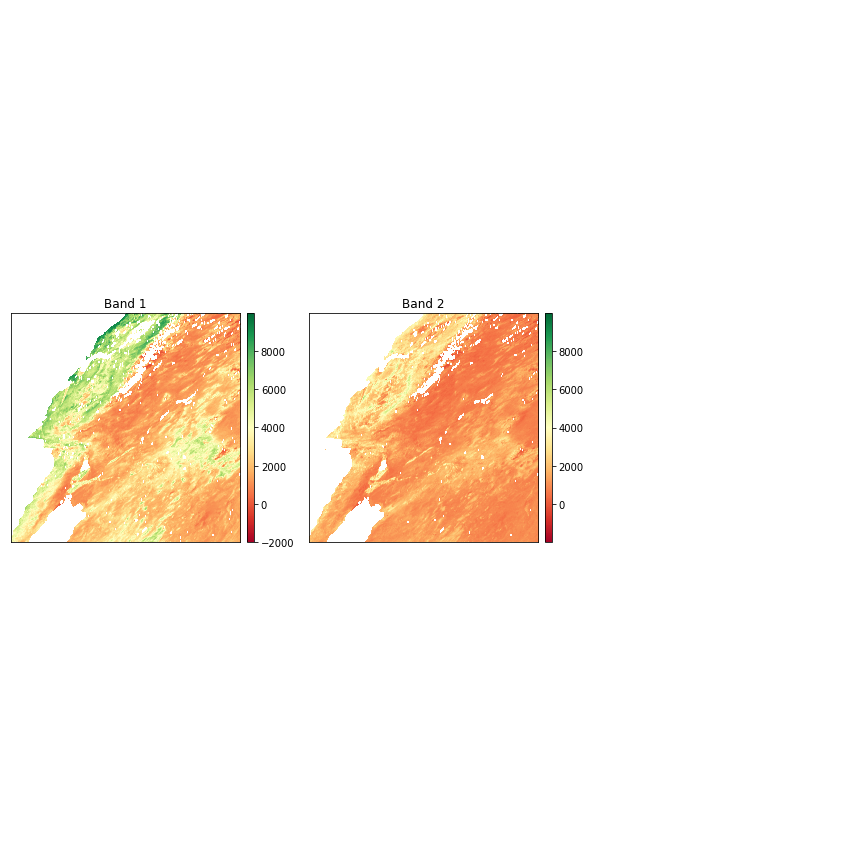

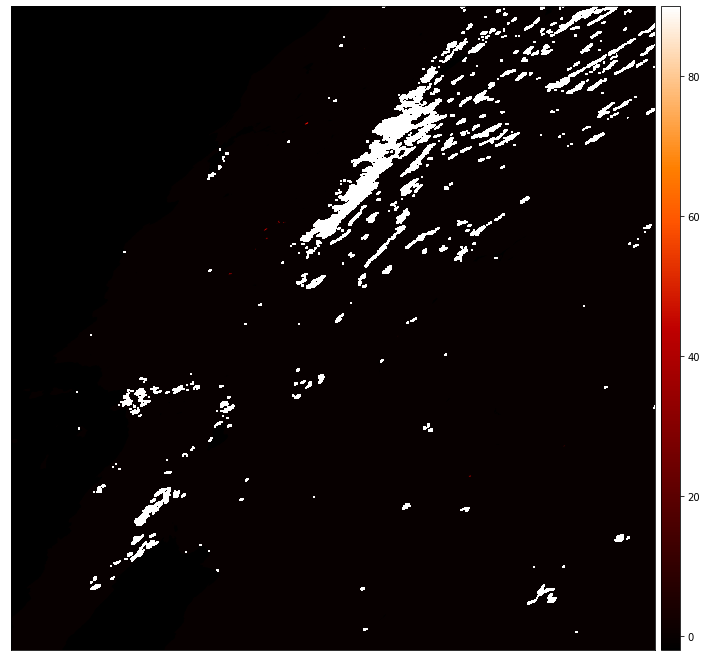

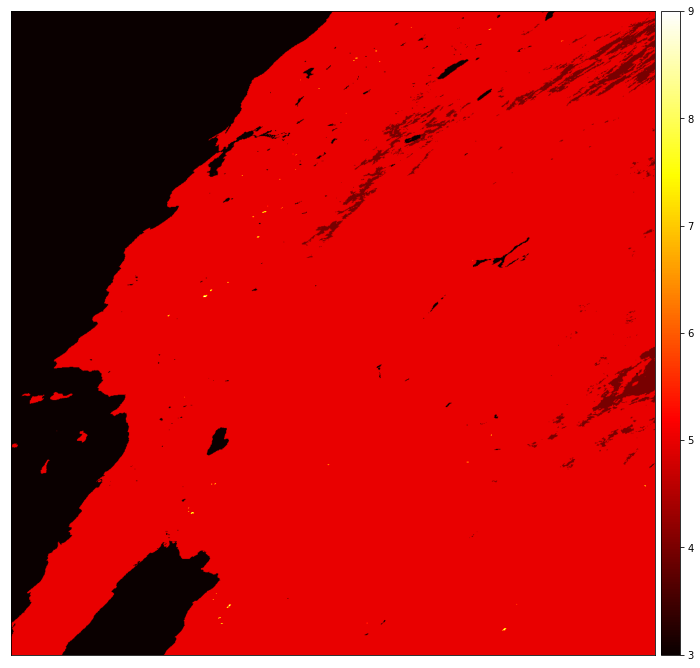

<class 'xarray.core.dataarray.DataArray'>


In [57]:


desired_bands=["250m 16 days NDVI","250m 16 days EVI"]

bands = rxr.open_rasterio(filePathNDVI, masked=True, variable=desired_bands).squeeze()
# for x in FIRE['Burn Date']['x'].squeeze():
#     print(x)
print(FIRE['Burn Date'])
ep.plot_bands(bands.to_array(), cmap='RdYlGn')
ep.plot_bands(FIRE['Burn Date'][0], cmap='gist_heat')
ep.plot_bands(FIREMASK1['FireMask'], cmap='hot')
print(type(bands.to_array()))

In [85]:
new_path = r'D:\CS_Course_Material\Graduate_Program\workspace\DATA\GEOTIFF\FIRE'

In [ ]:
# begin code for model
image_shape = (12777, 4800,8)

LSTMcnn = Sequential()
# add 2D Convelutional layers
LSTMcnn.add(TimeDistributed(Conv2D(8,(7,7), activation="relu",padding="same", input_shape = image_shape)))
cnn.add(TimeDistributed(MaxPooling2D(pool_size=(7, 7))))
cnn.add(TimeDistributed(Flatten()))
model.add(LSTM())
model.add(Dense())